In [2]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from pathlib import Path

In [3]:
# Load data
cwd = Path.cwd()
moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_with_labels', 'rb'))

In [4]:
cutoff = 15
#usedf = moondf[moondf["grade"] < cutoff]
usedf = moondf.drop(["is_benchmark", "repeats"], axis=1)

X = usedf.drop(['grade'], axis=1).values
y = usedf['grade'].values
print(usedf['grade'].value_counts(), usedf.head())

4     10153
5      8453
6      4045
8      3173
7      3074
9      1061
10      389
11      181
12       51
13       29
14       24
Name: grade, dtype: int64    0_4  0_5  0_8  0_9  0_10  0_11  0_12  0_13  0_14  0_15  ...  10_7  10_8  \
0    0    0    0    0     0     0     0     0     0     0  ...     0     0   
1    0    0    0    0     0     0     0     0     1     0  ...     0     0   
2    0    0    0    0     0     0     0     0     0     0  ...     0     0   
3    0    0    0    0     0     0     0     0     0     0  ...     0     0   
4    0    0    0    0     0     0     0     0     0     0  ...     0     0   

   10_9  10_10  10_11  10_12  10_13  10_15  10_17  grade  
0     0      0      0      0      0      0      0      5  
1     0      0      0      0      0      0      1      6  
2     0      0      0      0      0      0      0      4  
3     0      0      0      0      0      0      0      5  
4     0      0      0      0      0      0      0      4  

[5 rows x 142 colu

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = RandomForestClassifier(n_estimators=500, max_depth=1000, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.47886404439366737


In [6]:
# print the confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=clf.classes_, columns=clf.classes_))

      4    5    6    7    8   9   10  11  12  13  14
4   1507  501   34   22   25   2   0   1   1   0   0
5    522  937  118   56   64   1   0   0   0   0   0
6     77  403  108   77  124   3   1   0   0   0   0
7     39  211   74  105  133   5   0   0   0   0   0
8     16  192   68   81  252   8   1   3   0   0   0
9      2   34   15   22  127  18   4   0   0   0   0
10     2   12    1    2   42  10   4   0   0   0   0
11     0    3    1    6   22   1   0   2   0   0   0
12     0    1    0    1    9   1   0   0   1   0   0
13     0    0    0    0    4   0   0   0   0   0   0
14     1    1    1    0    5   0   0   0   0   0   0


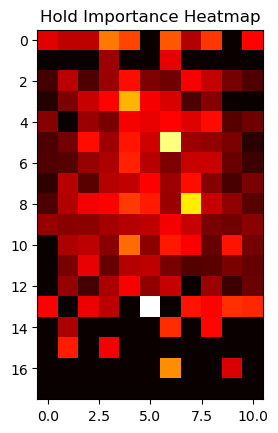

In [7]:
# Plot the feature importance
unique_holds = pickle.load(open(cwd / '..' / 'raw_data' / 'unique_holds', 'rb'))
importances = clf.feature_importances_

importance_map = np.zeros((11, 18))
for i in range(len(unique_holds)):
    hold = unique_holds[i]
    importance_map[hold[0], hold[1]] = importances[i]
    
plt.title('Hold Importance Heatmap')
plt.imshow(importance_map.T[::-1], cmap='hot', interpolation='none')

#
